In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 7.9 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=f366376018895aa57147b5af190da15fa830f9113c9fcb2f701bff08db99fbc3
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 3.2 MB/s 
     |████████████████████████████████| 6.3 MB 17.6 MB/s 
     |████████████████████████████████| 1.0 MB 39.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.0 MB 46.7 MB/s 
     |████████████████████████████████| 11.2 MB 42.4 MB/s 
     |████████████████████████████████| 16.7 MB 45.1 MB/s 
     |████████████████████████████████| 930 kB 41.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
import getpass

from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Open a TCP ngrok tunnel to the SSH server
connection_string = ngrok.connect(22, "tcp").public_url

ssh_url, port = connection_string.strip("tcp://").split(":")
print(f" * ngrok tunnel available, access with `ssh root@{ssh_url} -p{port}`")

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel available, access with `ssh root@6.tcp.ngrok.io -p12681`


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
import os
import threading

from flask import Flask,render_template
from pyngrok import ngrok
from flask import request

os.environ["FLASK_ENV"] = "development"

app = Flask(__name__)
port = 5000

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

# ... Update inbound traffic via APIs to use the public-facing ngrok URL


# Define Flask routes
@app.route("/")
def index():
    # return "Hello from Colab!"
    return render_template("index.html")
@app.route("/compute_map", methods = ['POST'])
def compute_map_server():
  data = request.form
  src=data["source"][1:-1]
  dst=data["destination"][1:-1]
  src=[float(x) for x in src.split(",")]
  dst=[float(x) for x in dst.split(",")]
  type=data["myRadio"]
  find_route(src,dst,type)
  return render_template("graph1.html")

app.run(use_reloader= False)
# Start the Flask server in a new thread
#threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunnel "http://1727-35-233-128-103.ngrok.io" -> "http://127.0.0.1:5000"
 * Serving Flask app "__main__" (lazy loading)
 * Environment: development
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Jul/2022 11:53:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jul/2022 11:53:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jul/2022 11:53:37] "GET /content/bootstrap.min.css HTTP/1.1" 404 -
127.0.0.1 - - [03/Jul/2022 11:53:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jul/2022 11:53:42] "GET /content/bootstrap.min.css HTTP/1.1" 404 -
127.0.0.1 - - [03/Jul/2022 11:53:45] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
127.0.0.1 - - [03/Jul/2022 11:54:45] "POST /compute_map HTTP/1.1" 200 -
127.0.0.1 - - [03/Jul/2022 12:04:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jul/2022 12:04:29] "GET /content/bootstrap.min.css HTTP/1.1" 404 -
127.0.0.1 - - [03/Jul/2022 12:05:04] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: 

In [ ]:
hump=open('templates/humps.txt','r')
hump_d={}
for i in hump:
  x=i.split(" ")
  hump_d[x[0]]=x[1][:-1]
potholes=open('templates/potholes.txt','r')
potholes_d={}
for i in potholes:
  x=i.split(" ")
  potholes_d[x[0]]=x[1][:-1]
worn_out=open('templates/worn_out.txt','r')
worn_out_d={}
for i in worn_out:
  x=i.split(" ")
  worn_out_d[x[0]]=x[1][:-1]

In [ ]:
hump=open('templates/humps1.txt','r')
hump_d={}
for i in hump:
  x=i.split(" ")
  hump_d[x[0]]=x[1][:-1]
potholes=open('templates/potholes1.txt','r')
potholes_d={}
for i in potholes:
  x=i.split(" ")
  potholes_d[x[0]]=x[1][:-1]
worn_out=open('templates/worn_out1.txt','r')
worn_out_d={}
for i in worn_out:
  x=i.split(" ")
  worn_out_d[x[0]]=x[1][:-1]

In [ ]:
worn_out_d

{'1151522373->2307604246': '16.1517815-75.67315283333333,16.151863166666665-75.67338616666666',
 '1151522373->3293467188': '16.152851-75.67410066666666',
 '1151522524->2307588820': '16.1741815-75.659244',
 '1151522603->1467806582': '16.1722635-75.660309',
 '1151522952->1422071281': '16.147078-75.67046033333334,16.147023333333333-75.670699,16.146969833333333-75.67095183333333,16.1469315-75.67109516666666,16.1468965-75.6712395,16.146842666666668-75.67147216666666,16.146810833333333-75.67160883333334,16.146763833333335-75.6717495,16.1467285-75.67190216666667,16.1466915-75.67206016666667,16.1466545-75.67219666666666,16.146633166666668-75.671368,16.146690666666668-75.671109,16.146718666666665-75.67096433333333,16.146762833333334-75.67081866666666,16.146794333333332-75.670675,16.146849-75.67041316666666,16.146897-75.67015583333334,16.146861-75.6699465,16.147314666666666-75.6701495',
 '1151522952->2307604246': '16.150358833333332-75.672437,16.149999-75.67216916666666',
 '1151523043->142207128

In [ ]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
hump_list=[]
pothole_list=[]
worn_out_list=[]
def compute_map(source,dest,type):
  global hump_list
  hump_list=[]
  global pothole_list
  pothole_list=[] 
  global worn_out_list
  worn_out_list=[]
  lat=(source[0]+dest[0])/2
  lng=(source[1]+dest[1])/2
  distance=ox.distance.great_circle_vec(source[0], source[1], dest[0], dest[1], earth_radius=6371009);
  G = ox.graph_from_point((lat,lng), dist=distance,dist_type="network",simplify=False,retain_all=True, network_type='drive')
  orig= ox.nearest_nodes(G, [source[1]],[source[0]])[0]
  desti= ox.nearest_nodes(G, [dest[1]],[dest[0]])[0]
  route=[]
  if(type=="length"):
    route = nx.shortest_path(G, orig, desti, weight=pathlengthbylength)
  if(type=="travel_time"):
    route = nx.shortest_path(G, orig, desti, weight=pathlengthbylength)
    route = nx.shortest_path(G, orig, desti, weight='travel_time')
  if(type=="comfortable"):
    route=nx.shortest_path(G, orig, desti, weight=pathlength)
  return G,route

In [ ]:
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = False,
        control = True,
        show=False
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = False,
        control = True,
        show=False
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = False,
        control = True,
        show=False
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = False,
        control = True,
        show=False
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True,
        show=False
    )
}


In [ ]:
from folium.plugins import MarkerCluster,AntPath,LocateControl
def find_route(src,dst,type):
  global G,route
  G,route=compute_map(src,dst,type)
  find_humps()
  filepath = "templates/graph1.html"
  m3=folium.Map(location =src, tiles='OpenStreetMap' , zoom_start = 15)
  l=[]
  for i in route:
    node0 = G.nodes(data=True)[i]
    lat2=node0['x']
    lng2=node0['y']
    k=[lng2,lat2]
    l.append(k)
  AntPath(l).add_to(m3)
  LocateControl(auto_start=True,setView="always",
                strings={"title": "See you current location",
                  "popup": "Your position",
                  }).add_to(m3)
  folium.TileLayer('openstreetmap').add_to(m3)
  folium.TileLayer('Stamen Terrain').add_to(m3)
  basemaps['Google Maps'].add_to(m3)
  basemaps['Google Satellite Hybrid'].add_to(m3)
  basemaps['Esri Satellite'].add_to(m3)
  basemaps['Google Terrain'].add_to(m3)
  folium.TileLayer('Stamen Toner').add_to(m3)
  folium.TileLayer('Stamen Water Color').add_to(m3)
  folium.TileLayer('cartodbpositron').add_to(m3)
  folium.TileLayer('cartodbdark_matter').add_to(m3)
  # Add custom basemaps
 
  marker_cluster_hump = folium.plugins.MarkerCluster(name="Hump").add_to(m3)
  marker_cluster_pothole = folium.plugins.MarkerCluster(name="Pothole").add_to(m3)
  for y in all_humps:
    p=y.split("-")
    # print(p)
    start_latlng = (float(p[0]),float(p[1]))
    start_marker = folium.Marker(
              location = start_latlng,
              popup = "Hump",
              icon = folium.Icon(color='green',icon= "map-marker"))
    start_marker.add_to(marker_cluster_hump)
  for y in all_potholes:
    p=y.split("-")
    # print(p)
    start_latlng = (float(p[0]),float(p[1]))
    start_marker = folium.Marker(
              location = start_latlng,
              popup = "PotHole",
              icon = folium.Icon(color='red',icon= "map-marker"))
    start_marker.add_to(marker_cluster_pothole)
  marker_cluster_worn_out= []
  for x,y in worn_out_d.items():
    l=y.split(",")
    for k in l:
      p=k.split("-")
      # print(p)
      start_latlng = (float(p[0]),float(p[1]))
      marker_cluster_worn_out.append(start_latlng)
  folium.plugins.HeatMap(marker_cluster_worn_out,show=False,name="Worn_out_heat_map",radius=8,max_val=0.3,max_zoom=18,blur=10).add_to(m3)
  folium.LayerControl().add_to(m3)
  m3.save(filepath)
  return m3

In [ ]:
m3=find_route([16.168725,75.644170],[16.152179,75.638601],"comfortable")
m3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.


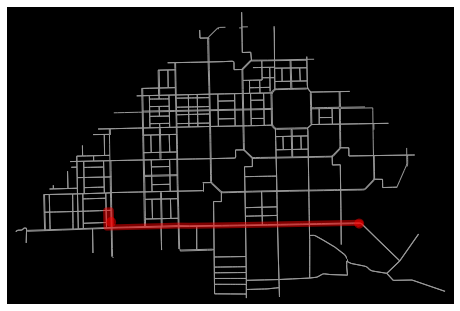

In [ ]:
source=[16.149778,75.644527]
dest=[16.149668,75.666031]
G,route=compute_map(source,dest,"comfortable")
#G,route=compute_map(source,dest,"travel_time")
#G,route=compute_map(source,dest,"length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [ ]:
print(len(hump_list),len(pothole_list))

0 0


In [ ]:
all_humps=[]
all_potholes=[]
for i in hump_list:
  k=i.split(",")
  humpss=k
  for j in k:
    min=99999999999
    m=[float(x) for x in j.split("-")]
    lat1=float(m[1])
    lng1=float(m[0])
    for i in route:
      node0 = G.nodes(data=True)[i]
      lat2=node0['x']
      lng2=node0['y']
      #print(lat1,lng1,lat2,lng2)
      actual_distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
      if(actual_distance<min):
        min=actual_distance
      #print(actual_distance)
    if(min<50):
      all_humps.append(j)
for i in pothole_list:
  k=i.split(",")
  humpss=k
  for j in k:
    min=99999999999
    m=[float(x) for x in j.split("-")]
    lat1=float(m[1])
    lng1=float(m[0])
    for i in route:
      node0 = G.nodes(data=True)[i]
      lat2=node0['x']
      lng2=node0['y']
      #print(lat1,lng1,lat2,lng2)
      actual_distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
      if(actual_distance<min):
        min=actual_distance
      #print(actual_distance)
    if(min<50):
      all_potholes.append(j)

In [ ]:
all_humps=[]
all_potholes=[]
def find_humps():
  global all_humps
  all_humps=[]
  global all_potholes
  all_potholes=[]
  for i in hump_list:
    k=i.split(",")
    humpss=k
    for j in k:
      min=99999999999
      m=[float(x) for x in j.split("-")]
      lat1=float(m[1])
      lng1=float(m[0])
      for i in route:
        node0 = G.nodes(data=True)[i]
        lat2=node0['x']
        lng2=node0['y']
        #print(lat1,lng1,lat2,lng2)
        actual_distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
        if(actual_distance<min):
          min=actual_distance
        #print(actual_distance)
      if(min<50):
        all_humps.append(j)
  for i in pothole_list:
    k=i.split(",")
    humpss=k
    for j in k:
      min=99999999999
      m=[float(x) for x in j.split("-")]
      lat1=float(m[1])
      lng1=float(m[0])
      for i in route:
        node0 = G.nodes(data=True)[i]
        lat2=node0['x']
        lng2=node0['y']
        #print(lat1,lng1,lat2,lng2)
        actual_distance=ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009);
        if(actual_distance<min):
          min=actual_distance
        #print(actual_distance)
      if(min<50):
        all_potholes.append(j)

In [ ]:
print(len(all_humps))
import folium

0


In [ ]:
def pathlength(src,dest,l):
  st1=str(src)+"->"+str(dest)
  st2=str(dest)+"->"+str(src)
  p=[0,0,0,0]
  k=potholes_d.get(st1,potholes_d.get(st2,0))
  if(k!=0):
    pothole_list.append(k)
    p[0]=len(k.split(","))
  k=hump_d.get(st1,hump_d.get(st2,0))
  if(k!=0):
    hump_list.append(k)
    p[2]=len(k.split(","))
  k=worn_out_d.get(st1,worn_out_d.get(st2,0))
  if(k!=0):
    worn_out_list.append(k)
    p[3]=len(k.split(","))
  #print(st1,p)
  dist=l[0]['length']
  if(p[0]!=0):
    dist*=1.2
  if(p[2]!=0):
    dist*=1.1
  if(p[3]!=0):
    dist*=1.3
  if(p[0]==0 and p[2]==0 and p[3]==0):
    dist*=0.95 
  return dist

In [ ]:
def pathlengthbylength(src,dest,l):
  st1=str(src)+"->"+str(dest)
  st2=str(dest)+"->"+str(src)
  #print(l[0])
  p=[0,0,0,0]
  k=potholes_d.get(st1,potholes_d.get(st2,0))
  if(k!=0):
    pothole_list.append(k)
    p[0]=len(k.split(","))
  k=hump_d.get(st1,hump_d.get(st2,0))
  if(k!=0):
    hump_list.append(k)
    p[2]=len(k.split(","))
  k=worn_out_d.get(st1,worn_out_d.get(st2,0))
  if(k!=0):
    worn_out_list.append(k)
    p[3]=len(k.split(","))
  #print(st1,p)
  dist=l[0]['length'] 
  return dist

In [ ]:
import folium
filepath = "templates/graph.html"
m3=ox.plot_route_folium(G, route,tiles='openstreetmap', zoom_start = 4,color="#0000FF",weight=5)
folium.TileLayer('openstreetmap').add_to(m3)
folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
folium.LayerControl().add_to(m3)
for y in all_humps:
  p=y.split("-")
  # print(p)
  start_latlng = (float(p[0]),float(p[1]))
  start_marker = folium.Marker(
            location = start_latlng,
            popup = "Hump",
            icon = folium.Icon(color='green'))
  start_marker.add_to(m3)
for y in all_potholes:
  p=y.split("-")
  # print(p)
  start_latlng = (float(p[0]),float(p[1]))
  start_marker = folium.Marker(
            location = start_latlng,
            popup = "PotHole",
            icon = folium.Icon(color='red'))
  start_marker.add_to(m3)

m3.save(filepath)
m3

In [ ]:
import folium
filepath = "templates/graph.html"
m3=folium.Map(location =[16.149778,75.644527], tiles='OpenStreetMap' , zoom_start = 15)
l=[]
for i in route:
  node0 = G.nodes(data=True)[i]
  lat2=node0['x']
  lng2=node0['y']
  k=[lng2,lat2]
  l.append(k)
folium.plugins.AntPath(l).add_to(m3)
folium.TileLayer('openstreetmap').add_to(m3)
folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
marker_cluster_hump = folium.plugins.MarkerCluster(name="Hump").add_to(m3)
marker_cluster_pothole = folium.plugins.MarkerCluster(name="Pothole").add_to(m3)
for y in all_humps:
  p=y.split("-")
  # print(p)
  start_latlng = (float(p[0]),float(p[1]))
  start_marker = folium.Marker(
            location = start_latlng,
            popup = "Hump",
            icon = folium.Icon(color='green',icon= "map-marker"))
  start_marker.add_to(marker_cluster_hump)
for y in all_potholes:
  p=y.split("-")
  # print(p)
  start_latlng = (float(p[0]),float(p[1]))
  start_marker = folium.Marker(
            location = start_latlng,
            popup = "PotHole",
            icon = folium.Icon(color='red',icon= "map-marker"))
  start_marker.add_to(marker_cluster_pothole)
marker_cluster_worn_out= []
for x,y in worn_out_d.items():
  l=y.split(",")
  for k in l:
    p=k.split("-")
    # print(p)
    start_latlng = (float(p[0]),float(p[1]))
    marker_cluster_worn_out.append(start_latlng)
folium.plugins.HeatMap(marker_cluster_worn_out,show=False,name="Worn_out_heat_map",radius=8,max_val=0.3,max_zoom=18,blur=10).add_to(m3)
folium.LayerControl().add_to(m3)
m3.save(filepath)
m3

In [ ]:
worn_out_d

{}

In [ ]:
import folium
filepath = "templates/graph.html"
m3=folium.Map(location =[16.149778,75.644527], tiles='OpenStreetMap' , zoom_start = 15)
l=[]
for i in route:
  node0 = G.nodes(data=True)[i]
  lat2=node0['x']
  lng2=node0['y']
  k=[lng2,lat2]
  l.append(k)
folium.plugins.AntPath(l).add_to(m3)
folium.TileLayer('openstreetmap').add_to(m3)
folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
marker_cluster_hump = []
marker_cluster_pothole = []

for y in all_humps:
  p=y.split("-")
  # print(p)
  start_latlng = (float(p[0]),float(p[1]))
  marker_cluster_hump.append(start_latlng)
for y in all_potholes:
  p=y.split("-")
  # print(p)
  start_latlng = (float(p[0]),float(p[1]))
  marker_cluster_hump.append(start_latlng)  
folium.plugins.HeatMap(marker_cluster_hump).add_to(m3)
folium.LayerControl().add_to(m3)
m3

In [ ]:
import folium
filepath = "templates/graph.html"
m3=folium.Map(location =[16.149778,75.644527], tiles='OpenStreetMap' , zoom_start = 15)
l=[]
for i in route:
  node0 = G.nodes(data=True)[i]
  lat2=node0['x']
  lng2=node0['y']
  k=[lng2,lat2]
  l.append(k)
folium.plugins.AntPath(l).add_to(m3)
folium.TileLayer('openstreetmap').add_to(m3)
folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
marker_cluster_hump = []
for x,y in worn_out_d.items():
  l=y.split(",")
  for k in l:
    p=k.split("-")
    # print(p)
    start_latlng = (float(p[0]),float(p[1]))
    marker_cluster_hump.append(start_latlng)
folium.plugins.HeatMap(marker_cluster_hump).add_to(m3)
folium.LayerControl().add_to(m3)
m3

In [ ]:



m3

In [ ]:
l

[[75.6445195, 16.1499462],
 [75.6444993, 16.1508591],
 [75.6444978, 16.1509257],
 [75.6440848, 16.1509123],
 [75.6441087, 16.149906],
 [75.6441189, 16.1494764],
 [75.6445295, 16.1494921],
 [75.6445988, 16.1494939],
 [75.646035, 16.1495297],
 [75.6474359, 16.1495647],
 [75.6475297, 16.149567],
 [75.648871, 16.1496005],
 [75.6488996, 16.1496012],
 [75.6489745, 16.1496031],
 [75.6502805, 16.1496451],
 [75.6503784, 16.1496438],
 [75.6504427, 16.149643],
 [75.6513328, 16.1496313],
 [75.6519823, 16.1496391],
 [75.6534769, 16.1496569],
 [75.654155, 16.149665],
 [75.6542195, 16.1496658],
 [75.654851, 16.149676],
 [75.6555628, 16.1496874],
 [75.656246, 16.1496984],
 [75.6565408, 16.1497032],
 [75.6577129, 16.149722],
 [75.6579538, 16.1497259],
 [75.6581664, 16.1497293],
 [75.6590323, 16.1497455],
 [75.6592984, 16.1497504],
 [75.6598431, 16.1497606],
 [75.6600879, 16.1497651],
 [75.6609534, 16.1497812],
 [75.6612025, 16.1497859],
 [75.6618088, 16.1497972],
 [75.662442, 16.149809],
 [75.6628624, 

In [ ]:
!pip install folium==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.8 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1 which is incompatible.


In [ ]:
import folium 
from folium.plugins import LocateControl
m = folium.Map()
# With default settings
LocateControl().add_to(m)